In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change directory
import os
os.chdir('/content/drive/MyDrive/ocr/data_full/cropped')
!ls

In [39]:
# check number of files in a folder
import glob
image_files = glob.glob("/content/drive/MyDrive/ocr/data_full/crops/cropped/*.jpg")
image_files[:10]

['/content/drive/MyDrive/ocr/data_full/crops/cropped/-.jpg',
 '/content/drive/MyDrive/ocr/data_full/crops/cropped/(দেহনির্গত).jpg',
 '/content/drive/MyDrive/ocr/data_full/crops/cropped/(খ).jpg',
 '/content/drive/MyDrive/ocr/data_full/crops/cropped/).jpg',
 '/content/drive/MyDrive/ocr/data_full/crops/cropped/(সম্পাদিত).jpg',
 '/content/drive/MyDrive/ocr/data_full/crops/cropped/(সাঃ)_.jpg',
 '/content/drive/MyDrive/ocr/data_full/crops/cropped/(সাঃ).jpg',
 '/content/drive/MyDrive/ocr/data_full/crops/cropped/,.jpg',
 '/content/drive/MyDrive/ocr/data_full/crops/cropped/+.jpg',
 '/content/drive/MyDrive/ocr/data_full/crops/cropped/(স.).jpg']

In [ ]:
# check file names/labels
labels = []
for i in image_files:
  labels.append(i.split("/")[-1].split(".")[0].split('_')[0])
labels[:5]

['আর', 'আলো', 'আকৃতি', 'উৎস', 'এই']

In [36]:
# remove files
!rm /content/drive/MyDrive/ocr/data_full/cropped/*

In [ ]:
# move Directory
!sudo mv /content/drive/MyDrive/ocr/crnn1/crnn-pytorch /content/drive/MyDrive/ocr

In [108]:
# source: folder where the images are in; destination: the location where data_file.txt will be generated
def generate_data_file(source, destination):
  print(source)
  print(destination+'/data_file.txt')
  image_files = glob.glob(source+'/*.jpg')
  labels = []
  for i in image_files:
    labels.append(i.split("/")[-1].split(".")[0].split('_')[0])  
  
  data = []
  for i in range(len(image_files)):
    data.append(image_files[i])
    data.append(labels[i])

  with open(destination+'/val_data_file.txt', 'w') as filehandle:
      for listitem in data:
          filehandle.write('%s\n' % listitem)

generate_data_file(source='/content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/val', destination='/content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images')

/content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/val
/content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/data_file.txt


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib
import math

# extracts/crops word images from the longer text jpg files according to the json
# the location of the source .jpg files and generated crops are hardcoded :(
    
def extract_images(json_obj):
  for j, k in enumerate(json_obj):
    #print(j)
    #print(json_obj['imagePath'])
    img = cv2.imread('/content/drive/MyDrive/ocr/data_full/unprocessed/'+json_obj['imagePath'])
    #print(img)

    for i in range(len(json_obj['shapes'])):
      x, y, w, h = return_coordinates(json_obj['shapes'][i]['points'])

      crop_img = img[y:h, x:w]
      #cv2_imshow(crop_img)
      try:
        matplotlib.image.imsave('/content/drive/MyDrive/ocr/data_full/cropped/'+str(json_obj['shapes'][i]['label']+'.jpg'), crop_img, format='jpg')
      except:
        continue

def return_coordinates(points):
  return math.trunc(points[0][0]), math.trunc(points[0][1]), math.trunc(points[1][0]), math.trunc(points[1][1])

extract_images(c[0])

In [ ]:
# change directory
import os
os.chdir('/content/drive/MyDrive/ocr/data_full/renamed')

In [ ]:
import glob
import json 

os.chdir('/content/drive/MyDrive/ocr/data_full/cropped')

# returns a list of jsons files in given directory
# combine it with extract_images() to generate the crops

def read_json(directory):
  files = glob.glob(directory+"/*.json")
  json_objs = []

  for i in files:
    f = open(i) 
    data = json.load(f) 
    json_objs.append(data)
    f.close()
  return json_objs

# generating crops
c = read_json("/content/drive/MyDrive/ocr/data_full/unprocessed")
print(c)
for i in c:
  try:
    extract_images(i)
  except:
    continue


[{'shapes': [{'label': 'বৃহত্তর', 'points': [[28.928571428571416, 88.28571428571428], [175.35714285714283, 165.07142857142856]]}, {'label': 'অর্থে', 'points': [[200.35714285714283, 65.07142857142857], [343.21428571428567, 154.35714285714283]]}, {'label': 'মানুষ', 'points': [[378.92857142857133, 75.78571428571428], [516.4285714285713, 150.78571428571428]]}, {'label': 'ধরিত্রীর', 'points': [[559.2857142857142, 38.285714285714285], [764.642857142857, 141.85714285714283]]}, {'label': 'সন্তান', 'points': [[802.142857142857, 68.64285714285714], [980.7142857142856, 138.28571428571428]]}, {'label': 'এই', 'points': [[1003.9285714285713, 36.49999999999999], [1111.0714285714284, 131.14285714285714]]}, {'label': 'বিশাল', 'points': [[1111.0714285714284, 66.85714285714285], [1252.142857142857, 134.7142857142857]]}, {'label': 'ভূখন্ডে', 'points': [[1266.4285714285713, 65.07142857142857], [1430.7142857142856, 136.5]]}, {'label': 'মানুষ', 'points': [[14.64285714285711, 188.28571428571428], [157.4999999

In [ ]:
print('/content/drive/MyDrive/ocr/data_full/cropped/'+c[0]['shapes'][3]['label']+'.png')

/content/drive/MyDrive/ocr/data_full/cropped/ধরিত্রীর.png


In [51]:
# check the number of files inside crops folder
import os
path = '/content/drive/MyDrive/ocr/data_full/resized'
files = os.listdir(path)

len(files)
#files[:10]

4685

In [49]:
# copy files to cropped directory 

!cp /content/drive/MyDrive/ocr/data_full/cropped/* /content/drive/MyDrive/ocr/data_full/resized/

In [43]:
# add numbers at the end of each image file... the model requires it
# ------ ALSO mutates original file
import glob
image_files = glob.glob("/content/drive/MyDrive/ocr/data_full/cropped/*.jpg")

for index, file in enumerate(image_files):
  name =  file.split('.')[0]
  #print(name)
  os.rename(file, os.path.join('/content/drive/MyDrive/ocr/data_full/cropped', str(name)+'_'+str(index)+'.jpg'))

In [110]:
#### Remember to generate train and val inside the model's folder... inside image folder removes all image
os.chdir('/content/drive/MyDrive/ocr/ocr-bengali-rcnn')
!python tool/create_dataset.py --out /content/drive/MyDrive/ocr/ocr-bengali-rcnn/data/val --file /content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/val_data_file.txt

Created dataset with 200 samples

Show some demo to prevent creating wrong lmdb data
The first line is the path to image and the second line is the image label
image: /content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/val/অঞ্চলভেদে_111.jpg
label: অঞ্চলভেদে

image: /content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/val/x_88.jpg
label: x



In [ ]:
generate_data_file(source='/content/drive/MyDrive/ocr/data_full/cropped', destination='/content/drive/MyDrive/ocr/data_full')

/content/drive/MyDrive/ocr/data
/content/drive/MyDrive/ocr/data/data_file.txt


In [ ]:
os.chdir("/content/drive/MyDrive/ocr/crnn-pytorch")
!python tool/create_dataset.py --out /content/drive/MyDrive/ocr/data_full/renamed --file /content/drive/MyDrive/ocr/data_full/data_file.txt

/content/drive/MyDrive/ocr/data_full/renamed/lock_0.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/data_1.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/বৃহত্তর_2.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/অর্থে_3.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/মানুষ_4.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/ধরিত্রীর_5.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/সন্তান_6.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/এই_7.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/বিশাল_8.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/ভূখন্ডে_9.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/জন্ম_10.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/নেয়_11.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/,_12.jpg does not exist
/content/drive/MyDrive/ocr/data_full/renamed/যে_13.jpg does not 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib
import math
import glob
import json 

# extracts/crops images from the jpg files according to the json
def extract_images(json_obj):
  img = cv2.imread(json_obj['imagePath'])
  
  for i,obj in enumerate(json_obj['shapes']):
    x, y, w, h = return_coordinates(json_obj['shapes'][i]['points'])
    crop_img = img[y:h, x:w]
    #cv2_imshow(crop_img)
    matplotlib.image.imsave(json_obj['shapes'][i]['label']+'_'+str(i)+'.jpg', crop_img)


def return_coordinates(points):
  return math.trunc(points[0][0]), math.trunc(points[0][1]), math.trunc(points[1][0]), math.trunc(points[1][1])


# returns a list of jsons in given directory
def read_json(directory):
  files = glob.glob(directory+"/*.json")
  json_objs = []

  for i in files:
    f = open(i) 
    data = json.load(f) 
    json_objs.append(data)
    f.close()
  return json_objs

c = read_json("/content/exp")
for i in c:
  extract_images(i)
#print(directory_json_list())


In [ ]:
image_files = glob.glob("/content/drive/MyDrive/ocr/data/*.jpg")
image_files

In [ ]:
labels = []
for i in image_files:
  labels.append(i.split("/")[-1].split(".")[0].split('_')[0])
labels

In [ ]:
labels

In [ ]:
data = []

for i in range(len(image_files)):
  data.append(image_files[i])
  data.append(labels[i])

with open('a.txt', 'w') as filehandle:
    for listitem in data:
        filehandle.write('%s\n' % listitem)

In [ ]:
!find . -name "*.png" -type f -delete

In [ ]:
!zip -r /content/data.zip /content/exp


In [67]:
# all the alphabet

def return_labels(source):
  image_files = glob.glob(source+'/*.jpg')
  labels = []
  for i in image_files:
    labels.append(i.split("/")[-1].split(".")[0].split('_')[0])  
  return labels

def extract_characters(label_list):
  characters = []
  for i in label_list:
    for j in i:
      if j not in characters:
        characters.append(j)
  return characters

labels = return_labels('/content/drive/MyDrive/ocr/data_full/crops/cropped')
ch = extract_characters(labels)
print(ch)

['-', '(', 'দ', 'ে', 'হ', 'ন', 'ি', 'র', '্', 'গ', 'ত', ')', 'খ', 'স', 'ম', 'প', 'া', 'ঃ', ',', '+', 'ক', 'θ', 'X', 'O', 'i', 'n', 't', 'e', 'r', 'a', 'c', 'o', 'আ', 'উ', 'π', 'f', 'u', 'd', 'm', 'l', '!', 'অ', 'ল', 'ই', 'ধ', 'য', '়', 'ু', 'ষ', 'ঠ', 'ী', 'ব', 'ং', 'শ', 'ৃ', 'থ', 'ৈ', 'চ', 'জ', 'ঞ', 'ভ', 'ঙ', 'ট', 'ণ', 'ও', '।', '1', 'x', '[', 'S', 'T', '3', '2', '^', 'h', 'I', 'g', '6', '5', '0', '9', 'J', 'A', 'ূ', 'ছ', 'ড', 'ফ', 'ঘ', 'এ', 'ঁ', 'ৎ', 'ঢ', ' ', 'ঈ', 'ৗ', 'ঋ', 'ঐ', 'ঔ', 'ঝ', '১', '০', '৩', '২', '৮', '৬', '৯', '৫', '৭', '৪']


In [68]:
# write the alphabets
with open('/content/drive/MyDrive/ocr/data_full/alphabets.py', 'w') as filehandle:
  for idx, listitem in enumerate(ch):
    if(idx == 0):
      filehandle.write('alphabet = """')
      filehandle.write('%s' % listitem)
      continue
    filehandle.write('\n%s' % listitem)
  filehandle.write('"""')


In [8]:
import os
os.chdir('/content/drive/MyDrive/ocr/ocr-bengali-rcnn')
!python train.py --trainroot /content/drive/MyDrive/ocr/ocr-bengali-rcnn/data/train --valroot /content/drive/MyDrive/ocr/ocr-bengali-rcnn/data/val

loading pretrained model from /content/drive/MyDrive/ocr/ocr-bengali-rcnn/expr/FinalnetCRNN_449_105.pth
CRNN(
  (cnn): Sequential(
    (conv0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu0): ReLU(inplace=True)
    (pooling0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU(inplace=True)
    (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU(inplace=True)
    (pooling2): MaxPool2d(kernel_size=(2, 2), stride=(2, 1), padding=(0, 1), dilation=1, ceil_mode=False)
    (conv4): Conv2d(256, 512, kern

In [9]:
!python demo.py -m /content/drive/MyDrive/ocr/ocr-bengali-rcnn/expr/FinalnetCRNN_249_105.pth -i /content/drive/MyDrive/ocr/ocr-bengali-rcnn/demo/উত্তরাধিকার_82.jpg

loading pretrained model from /content/drive/MyDrive/ocr/ocr-bengali-rcnn/expr/FinalnetCRNN_249_105.pth
উ-----ত্্তরাাা-ধিিক-াারর-- => উত্তরাধিকার         


In [ ]:
from PIL import Image
import os.path

filename = os.path.join('path', 'to', 'image', 'file')
img = Image.open('/content/drive/MyDrive/ocr/data/অর্থে_1.jpg')
print(img.size)

(100, 32)


In [ ]:
# checking image dimension to check for highest height
from PIL import Image
import glob
image_files = glob.glob("/content/drive/MyDrive/ocr/data/*.jpg")

img = Image.open(image_files[0])
maxh = img.size[0]
print(maxh)

for i in image_files:
  img = Image.open(i)
  maxh = max(maxh, img.size[0])
  #print(img.size[0])
  #print(maxh)
  #print(img.size[0])
print(maxh)


320
320


In [ ]:
# checking image dimension to check for highest width
from PIL import Image
import glob
image_files = glob.glob("/content/drive/MyDrive/ocr/data/*.jpg")

img = Image.open(image_files[0])
maxw = img.size[1]
print(maxw)

for i in image_files:
  img = Image.open(i)
  maxw = max(maxw, img.size[1])
  #print(img.size[0])
  #print(maxw)
  #print(img.size[1])
print(maxw)


144
144


In [ ]:
from PIL import Image
import os, sys

path = "/content/drive/MyDrive/ocr/data_full/renamed"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((200,200), Image.ANTIALIAS)
            imResize.save(f + ' resized.jpg', 'JPEG', quality=90)

resize()

In [ ]:
from PIL import Image
import os, sys

path = "/content/drive/MyDrive/ocr/data"
dirs = os.listdir( path )
print(dirs)

['data_file.txt', 'alphabets.py', '.ipynb_checkpoints', 'originals', 'আকৃতি_33.jpg', 'আর_41.jpg', 'এক_80.jpg', 'এই_5.jpg', 'আলো_14.jpg', 'উৎস_71.jpg', 'অর্থে_1.jpg', 'ও_34.jpg', 'উত্তরাধিকার_82.jpg', 'ও_43.jpg', 'একাত্ম_31.jpg', 'তার_17.jpg', 'গভীর_65.jpg', 'তার_30.jpg', 'গুণ_66.jpg', 'চেয়েও_88.jpg', 'জন্ম_9.jpg', 'জননী_84.jpg', 'গরীয়সী_89.jpg', 'তখন_86.jpg', 'জন্মভূমি_85.jpg', 'তাই_78.jpg', 'ধর্ম_24.jpg', 'দেশপ্রেম_60.jpg', 'দেশের_23.jpg', 'দেশপ্রেমের_70.jpg', 'দেশপ্রীতি_77.jpg', 'ধরিত্রীর_3.jpg', 'দেশের_50.jpg', 'দেশের_13.jpg', 'ধূলিকণায়_16.jpg', 'নেয়_10.jpg', 'পালা_28.jpg', 'প্রীতির_74.jpg', 'বৃহত্তর_0.jpg', 'নিশ্বাস_18.jpg', 'মমত্ববোধ_57.jpg', 'বাতাস_15.jpg', 'বন্ধন_75.jpg', 'ভালবাসা_52.jpg', 'প্রতি_56.jpg', 'মমত্ববোধই_64.jpg', 'ভূখন্ডে_7.jpg', 'মহৎ_81.jpg', 'মানুষের_61.jpg', 'মুক্তি_35.jpg', 'যে_12.jpg', 'মানুষ_8.jpg', 'মানুষ_2.jpg', 'মানুষের_69.jpg', 'মহিমাদীপ্ত_90.jpg', 'সে_22.jpg', 'সামাজিক_68.jpg', 'সন্তান_47.jpg', 'স্বদেশ_45.jpg', 'সেই_36.jpg', 'তার_38.jpg', 'স্বভাবজাত

In [ ]:
im = Image.open('/content/drive/MyDrive/ocr/data/অর্থে_1.jpg')
im
imResize = im.resize((500,500), Image.ANTIALIAS)
imResize.show()


In [ ]:
!cp `find /content/drive/MyDrive/ocr/data -name "*.jpg"` /content/drive/MyDrive/ocr/data/originals


In [79]:
import glob

files = glob.glob("/content/drive/MyDrive/ocr/data_full/resized/*.jpg")
len(files)

4685

In [58]:
files[100]

'/content/drive/MyDrive/ocr/data_full/resized/অগতি_100.jpg'

In [64]:
# resize images to fit the model
#!python3 -m pip install --upgrade Pillow
from PIL import Image

files = glob.glob("/content/drive/MyDrive/ocr/data_full/resized/*.jpg")
# len(files)
for idx, i in enumerate(files):
  try:
    im = Image.open(i)
    imResize = im.resize((100,32), Image.ANTIALIAS)
    imResize.save(i)
  except:
    print(i)
    continue



/content/drive/MyDrive/ocr/data_full/resized/ব_2831.jpg
/content/drive/MyDrive/ocr/data_full/resized/বস্তুর_2922.jpg


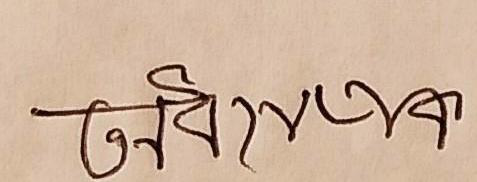

In [97]:
im = Image.open('/content/drive/MyDrive/ocr/data_full/অধ্যাপক_1.jpg')
im


['/content/drive/MyDrive/ocr/data_full/অধ্যাপক_1.jpg', '/content/drive/MyDrive/ocr/data_full/অধ্যায়_2.jpg', '/content/drive/MyDrive/ocr/data_full/অধ্যয়নরত_0.jpg']


In [106]:
# take our 200 random images for validation

from random import sample 
import shutil

files = glob.glob('/content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/*.jpg')
from random import sample 

#selected = sample(files,200)
selected = files
#selected[0].split('/')[-1]
#print(len(selected))
for image_files in selected:
  image_file = image_files.split('/')[-1]
  #print("/content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/"+image_file)
  #print("/content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/val/"+image_file)
  shutil.move("/content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/"+image_file, "/content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/train/"+image_file)

In [100]:
f = glob.glob('/content/drive/MyDrive/ocr/ocr-bengali-rcnn/images/processed_images/*.jpg')
len(f)

3544